# Image Watermarking Project

In this project, we add a watermark to an image. Adding a watermark works as a copyright for your image, so that no one can illegally use your image or document. Different organizations can use it to make their content secure so that their content cannot be misused without thier license or a paid version Project will use OpenCV to add logo and text as a watermark.

We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

In [1]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

For this project we need an image url on which we will apply watermark. We will load the image using the url of the image from google images. You can use any image that you desire and replace the url of the image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.

### Image Watermark

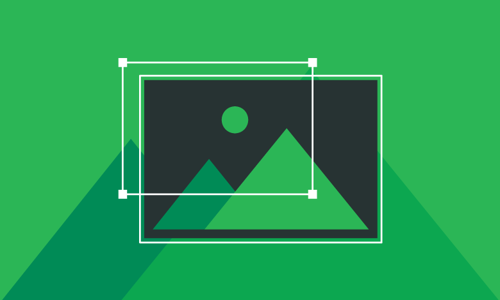

In [2]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw =| image.resize((500,300))
image_logow

For logo we are using logo which is downloaded using the above url.

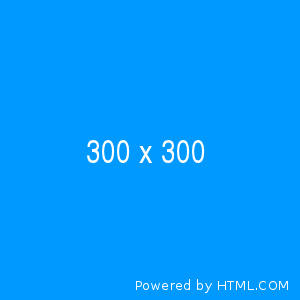

In [6]:
# Reading logo form url
logo = Image.open(requests.get('https://via.placeholder.com/300/09f/fff.png', stream=True).raw)
logo

In order to use these images we will first convert them into rbg format and store it as a numpy array. Similarly, we will also extract the shape i.e. it's height and width. 

In [8]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

We will place our watermark in the center of the image so for that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using height and width of the image. 

In [9]:
# Get the center of the original. It's the location where we will place the watermark

#Center(x,y)
center_y = int(h_image / 2)
center_x = int(w_image / 2)

top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

A Region of Interest defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next we will use OpenCV to merge our logo on ROI. Similarly we will also add a line or a pattern on our image.

In [10]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

Now we will convert the image from array to RGB and visualize it.

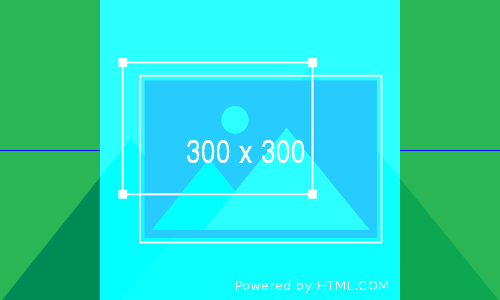

In [11]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

### Text Watermark

Next we shall see how we can use a text as a watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

In [12]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Pulkit', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

To visualize the image we need to convert it back to RGB format.

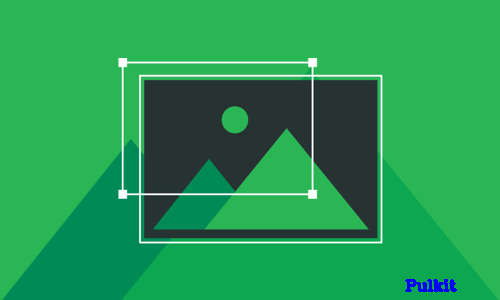

In [13]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg